In [1]:
import CMGDB
import math
import matplotlib

### Three-age class Leslie model with padding

In [2]:
def f(x):
    theta_1 = 28.9 # 26.27 # 21.05 # 19.6
    theta_2 = 29.8 # 23.68 # 24.15 # 45.77 # 23.68
    theta_3 = 22.0 # 21.05 # 26.27 # 24.15 # 23.68
    return [(theta_1 * x[0] + theta_2 * x[1] + theta_3 * x[2]) * math.exp(-0.1 * (x[0] + x[1] + x[2])), 0.7 * x[0], 0.7 * x[1]]

# Define box map for f
def F(rect):
    return CMGDB.BoxMap(f, rect)

# Box map for f with padding
# def F(rect):
#     return CMGDB.BoxMap(f, rect, padding=True)

In [3]:
lower_bounds = [-0.1, -0.1, -0.1]
upper_bounds = [90.0, 70.0, 70.0]

subdiv_min = 36 # 30
subdiv_max = 42 # 36 # 40
subdiv_init = 0 # 18
subdiv_limit = 10000

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [4]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

Compute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 1
CPU times: user 35.8 s, sys: 373 ms, total: 36.1 sCompute_Morse_Graph. B phase_space -> size () == 1514781
Total Grid Memory (can be external) = 159634516
Max Memory For Single Grid (must be internal)= 27820700
Max SCC Random Access memory use (must be internal)= 4203794
Max SCC stack memory use (can be external memory) = 8484496
 ---- SUMMARY ---- 
Internal Memory Requirement = 32024494
External Memory Requirement = 168119012
Max graph memory size (never stored, however) = 50641144

Wall time: 36.2 s


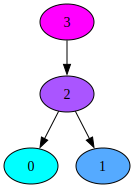

In [5]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

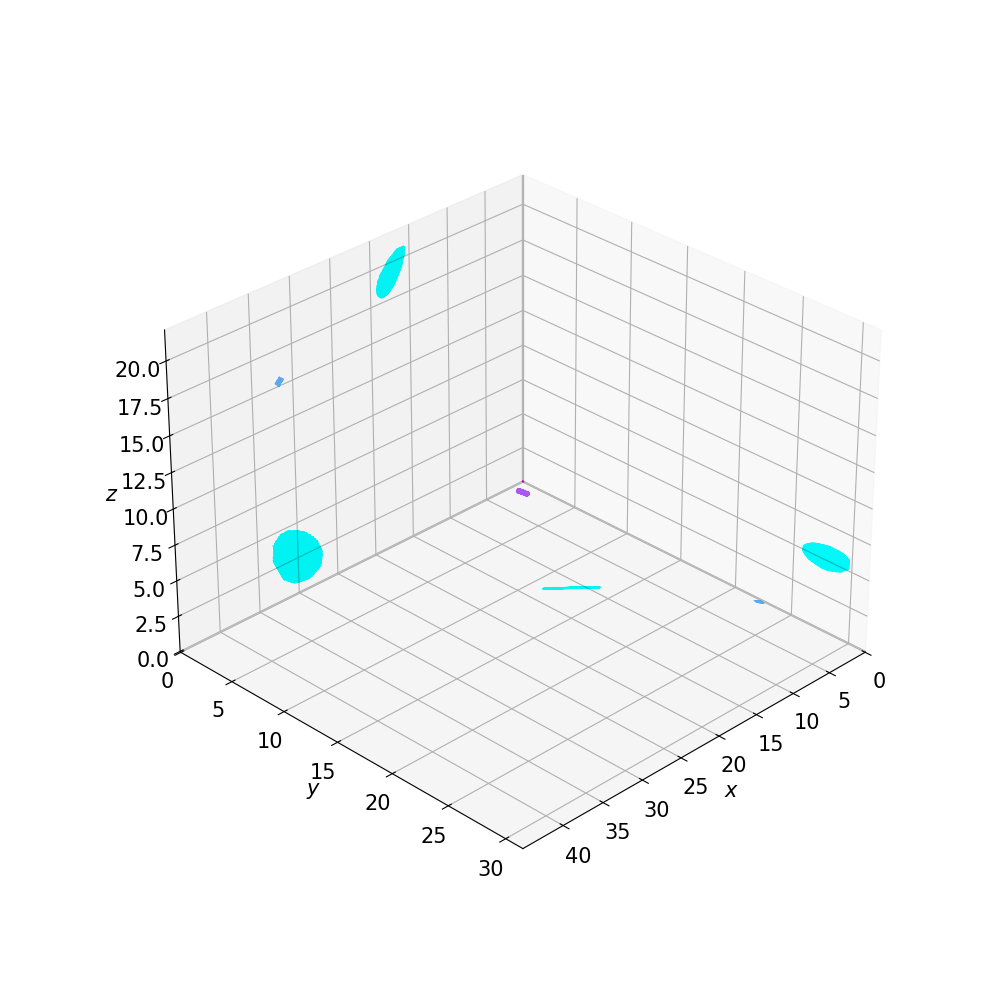

In [6]:
%matplotlib widget
CMGDB.PlotMorseSets3D(morse_graph,cmap=matplotlib.cm.cool)

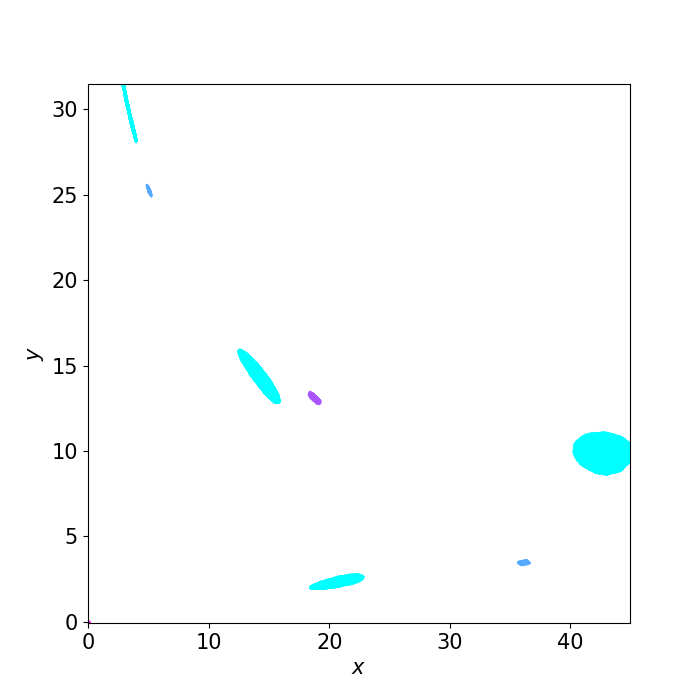

In [7]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=7, fig_h=7)

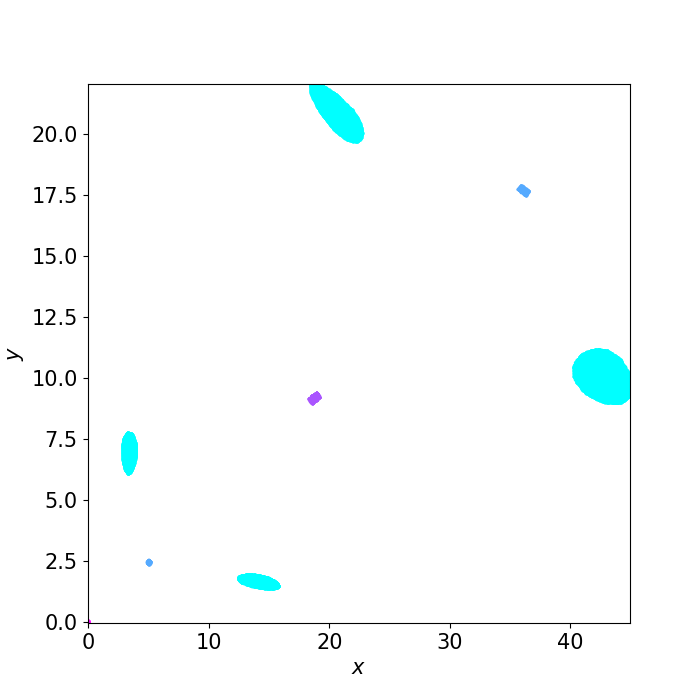

In [8]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, proj_dims=[0, 2], fig_w=7, fig_h=7)